Table of content 
1. import labraries 
2. import dataset from tensorflow built-in dataset collection 
3. Train test split 
4. Visualization images and their corresponding labels
5. Data Preprocessing 
6. Build, Train, Evaluate Convolutional Neural Network model performance 

In [3]:
# import labraies 
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import numpy as np
tfds.disable_progress_bar()

In [4]:
#import data from tensorflow dataset and get info on dataset 
data = tfds.builder('beans')
info = data.info
info 

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

In [5]:
# Returns both train and test split separately

train, test = tfds.load('beans', split=['train', 'test'])
print(train)
print(test)

<PrefetchDataset shapes: {image: (500, 500, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<PrefetchDataset shapes: {image: (500, 500, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>


,image,label
0,,1 (bean_rust)
1,,1 (bean_rust)
2,,0 (angular_leaf_spot)
3,,0 (angular_leaf_spot)
4,,1 (bean_rust)
5,,0 (angular_leaf_spot)
6,,0 (angular_leaf_spot)
7,,0 (angular_leaf_spot)
8,,0 (angular_leaf_spot)
9,,1 (bean_rust)

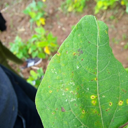
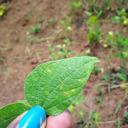
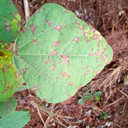
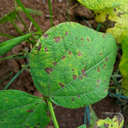
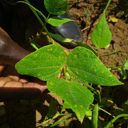
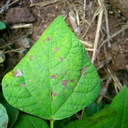
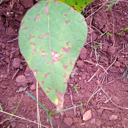
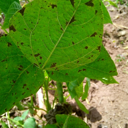
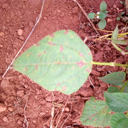
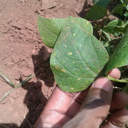
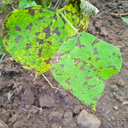
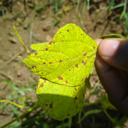
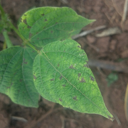
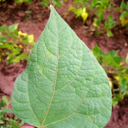
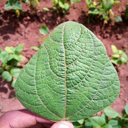
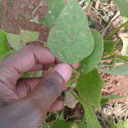
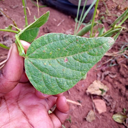
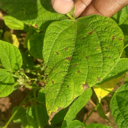
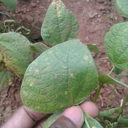
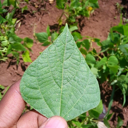

In [6]:
# Visualization images and their corresponding labels
tfds.as_dataframe(train.take(20), info)

In [7]:
# convert data to np.array 
test_image, test_label = tfds.as_numpy(tfds.load(
    'beans',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

print(type(test_image), test_image.shape)
print(type(test_label), test_label.shape)
train_image, train_label = tfds.as_numpy(tfds.load(
    'beans',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

print(type(train_image), train_image.shape)
print(type(train_label), train_label.shape)

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


<class 'numpy.ndarray'> (128, 500, 500, 3)
<class 'numpy.ndarray'> (128,)
<class 'numpy.ndarray'> (1034, 500, 500, 3)
<class 'numpy.ndarray'> (1034,)


In [8]:
# covert images to float32 type than scale images
train_image = train_image.astype('float32')
test_image = test_image.astype('float32')

train_image = train_image/255
test_image = test_image/255

In [9]:
# build model 
# size of the image 500x500 with 3 bytes color
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
model.fit(train_image, train_label, epochs=5, batch_size=64, validation_data=(test_image, test_label))

Epoch 1/5
17/17 [==============================] - 242s 14s/step - loss: 0.0929 - accuracy: 0.9845 - val_loss: 0.6934 - val_accuracy: 0.7344
Epoch 2/5
17/17 [==============================] - 245s 14s/step - loss: 0.0280 - accuracy: 0.9981 - val_loss: 0.9550 - val_accuracy: 0.7109
Epoch 3/5
17/17 [==============================] - 241s 14s/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.9094 - val_accuracy: 0.7344
Epoch 4/5
17/17 [==============================] - 253s 15s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.0239 - val_accuracy: 0.6641
Epoch 5/5
17/17 [==============================] - 247s 15s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.9223 - val_accuracy: 0.7266
